In [4]:
ASSIGNMENT 2 LOGISTIC REGRESSION 
SUBMITTED BY -  SUNIDHI RAWAT(DS3)

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
titanic = pd.read_csv("C:/Users/sunid/Downloads/titanic.csv")
titanic.shape

(887, 8)

In [3]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


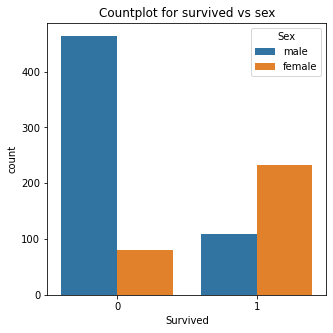

In [5]:
plt.figure(figsize = (5,5))
plt.title("Countplot for survived vs sex")
sns.countplot(x ="Survived",hue = "Sex",data = titanic )
plt.show()

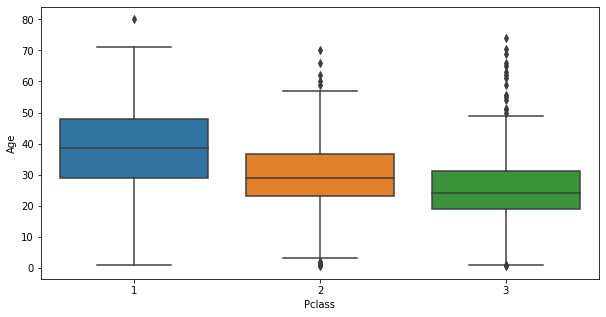

In [6]:
plt.figure(figsize= (10,5))
sns.boxplot(x= "Pclass", y = "Age", data = titanic)
plt.show()

In [7]:
 tit_null1 = titanic.isnull()
tit_null2 = titanic.isnull().sum()
tit_null1
tit_null2



Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

<AxesSubplot:>

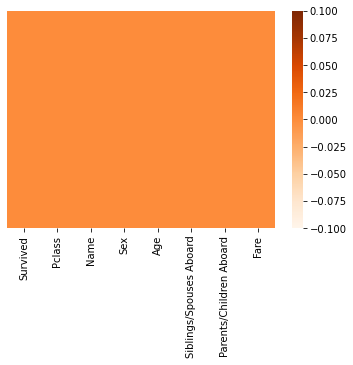

In [8]:
sns.heatmap(tit_null1,yticklabels=False,cmap='Oranges')


In [19]:
df = pd.DataFrame(titanic, columns=["Name", "Sex"])
df1 = pd.get_dummies(df["Sex"])
df2 = pd.concat((df1, df), axis=1)
#df2 = df2.drop(["Sex"], axis=1)
output = df2.rename(columns={"male": "Sex"})
output = output.drop(["Name"], axis=1 , inplace= True)
#titanic = titanic.drop(["Sex"], axis=1)
titanic = pd.concat((titanic, output), axis=1)
titanic = titanic .drop(["Name"], axis=1)
titanic.head(10)

KeyError: "['Name'] not found in axis"

In [10]:
X = titanic.drop("Survived",axis=1)
Y= titanic["Survived"]

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
lmodel=LogisticRegression() # initialize the model
lmodel.fit(X_train,Y_train) # fit the model
pred=lmodel.predict(X_test)


In [16]:
pred = lmodel.predict(X_test)

In [13]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       162
           1       0.61      0.39      0.48       105

    accuracy                           0.66       267
   macro avg       0.65      0.61      0.61       267
weighted avg       0.65      0.66      0.64       267



In [14]:
acc = accuracy_score(Y_test,pred)
percentage = round((acc)*100)
percentage

66